In [3]:
# Exploring Fancy indexing

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements.We could do it like this:

In [4]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [5]:
ind  = [3, 7, 4] # sinle list
x[ind]


array([71, 86, 60])

In [6]:
ind = np.array([[3, 7],
              [4, 5]])

In [7]:
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions.

In [8]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

In [11]:
# We combine a column vector and a row vector within the indices, we get a two dimensional

In [12]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [13]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [14]:
# combined Indexing

In [15]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [16]:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [17]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [18]:
# We can combinig fancy indexing with masking 

In [19]:
mask = np.array([1, 0, 1, 0], dtype = bool)
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [20]:
# selecting random Points

In [21]:
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]
x = rand.multivariate_normal(mean, cov, 100)
x.shape

(100, 2)

we can visualize these points as a scatter-point

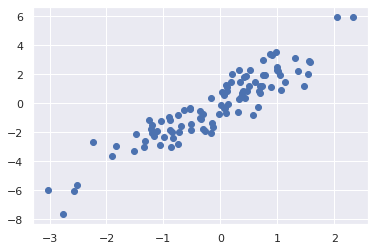

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(x[:, 0], x[:, 1]);

In [23]:
# We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion o f the original array                                                              

In [27]:
indices = np.random.choice(x.shape[0], 20, replace= False)
indices

array([95, 99, 87, 52,  9, 10, 30, 19, 51, 27, 96, 64,  3,  4, 62, 88, 58,
       36, 53, 57])

In [28]:
selection = x[indices] # fancy indexing here
selection.shape

(20, 2)

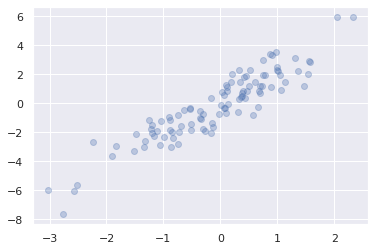

In [29]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor = 'none', s=200);

In [30]:
# Modifying Values with Fancy Indexing

In [31]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


we can any assignment-type operator for this

In [32]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [33]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [35]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [36]:
# Binning Data

In [40]:
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

The counts now reflect the number of points within each bin_in other words, a histogram

ValueError: 'steps' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

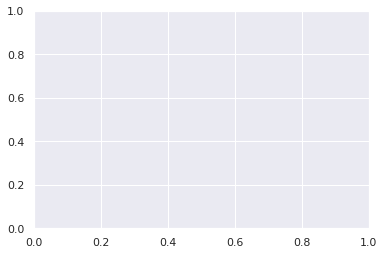

In [41]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

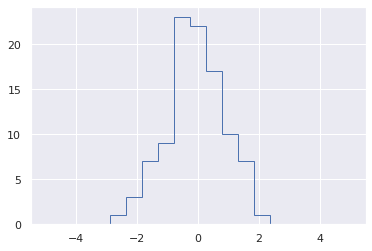

In [42]:
plt.hist(x, bins, histtype='step');

In [43]:
print("Numpy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy routine:
22.1 µs ± 428 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
custom routine:
10.5 µs ± 22.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
